In [1]:
## Homework - Whale Analysis ##

In [64]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [168]:
# Reading, cleaning and combining data into a single frame #

## Borrowing code from previous projects module 3 ##

whale_returns_path = Path("Resources/whale_returns.csv")
algo_returns_path = Path("Resources/algo_returns.csv")
sp500_history_path = Path("Resources/sp500_history.csv")

# Read in data
whale_returns = pd.read_csv(whale_returns_path, parse_dates=True)
algo_returns = pd.read_csv(algo_returns_path, parse_dates=True)
sp500_history = pd.read_csv(sp500_history_path, parse_dates=True)

# Check for nulls
whale_returns.isnull().mean() * 100
whale_returns.isnull().sum()
algo_returns.isnull().mean() * 100
algo_returns.isnull().sum()
sp500_history.isnull().mean() * 100
sp500_history.isnull().sum()

# Drop na
whale_returns = whale_returns.dropna()
algo_returns = algo_returns.dropna()
sp500_history = sp500_history.dropna()

# Validate no more missing values
whale_returns.isnull().sum()
whale_returns.head()
algo_returns.isnull().sum()
algo_returns.head()
sp500_history.isnull().sum()
sp500_history.head()

# Set Date as index
whale_returns = whale_returns.set_index('Date')
algo_returns = algo_returns.set_index('Date')
sp500_history = sp500_history.set_index('Date')

# Sort Date as Index
whale_returns = whale_returns.sort_index()
algo_returns = algo_returns.sort_index()
sp500_history = sp500_history.sort_index()

# Set Date Format
#whale_returns[‘Date’] = pd.to_datetime(whale_returns[‘Date’])
#whale_returns[‘date’] = whale_returns[‘Date’].dt.strftime(‘%Y-%m-%d’)
#algo_returns[‘Date’] = pd.to_datetime(algo_returns[‘Date’])
#algo_returns[‘date’] = algo_returns[‘Date’].dt.strftime(‘%Y-%m-%d’)
#sp500_history[‘Date’] = pd.to_datetime(sp500_history[‘Date’])
#sp500_history[‘date.1’] = sp500_history[‘Date’].dt.strftime(‘%Y-%m-%d’)

In [169]:
# Convert string to float for clean numeric format

sp500_history['Close'] = sp500_history['Close'].str.replace('$', '').str.replace(',', '').astype(float)

# Convert S&P 500 closing prices to returns

sp500_returns = sp500_history.pct_change().dropna()


In [170]:
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [171]:
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [177]:



sp500_returns.head()

,Close
Date,
1-Apr-14,0.206988
1-Apr-15,0.092372
1-Apr-16,0.006355
1-Apr-19,0.383258
1-Aug-13,-0.404689


In [178]:
# Join daily returns files together into a single data frame with columns for each portfolio's returns

# Create a new pivot table where the columns are the closing prices for each ticker

all_returns = pd.concat([whale_returns, algo_returns, sp500_returns], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
all_returns.sort_index(inplace=True)

# Display a few rows

all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,


IndexError: index 0 is out of bounds for axis 0 with size 0

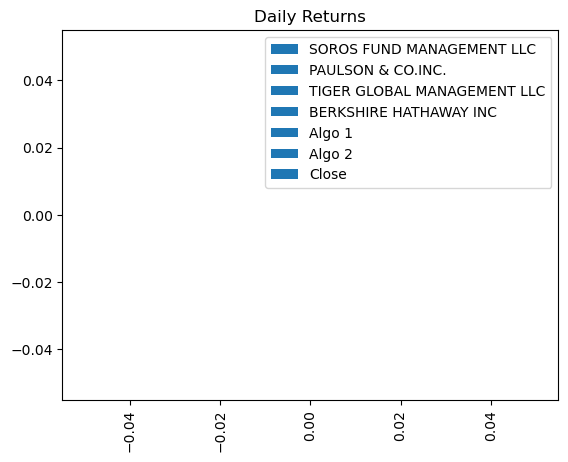

In [96]:
# Calculate and plot daily returns of all portfolios

all_returns.plot.bar(title='Daily Returns')

In [44]:
# Calculate and plot cumulative returns for all portfolios


# Does any portfolio outperform the S&P 500?

In [45]:
# Create a box plot for each of the returns

In [46]:
# Calculate the standard deviation for each portfolio

In [47]:
# Determine which portfolios are riskier than the S&P 500

In [48]:
# Calculate the annualized standard deviation

In [49]:
# Calculate and plot the rolling standard deviation for all portfolios, using a 21-day window

In [50]:
# Calculate and plot the correlation between each stock to determine which portfolios mimic the S&P 500

In [51]:
# Choose one portfolio, then calculate and plot the 60-day rolling beta between that portfolio and the S&P 500

In [52]:
# Using the daily returns, calculate the Sharpe ratios and visualize them in a bar plo

In [ ]:
# Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios